In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
train_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/train.csv"
test_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/test.csv"
sample_submission_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/sample_submission.csv"
tags_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/tags.csv"
genome_scores_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/genome_scores.csv"
genome_tags_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/genome_tags.csv"
imdb_data_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/imdb_data.csv"
links_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/links.csv"
movies_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/movies.csv"

In [6]:
# Load datasets into Pandas DataFrames
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample_submission = pd.read_csv(sample_submission_path)
tags = pd.read_csv(tags_path)
genome_scores = pd.read_csv(genome_scores_path)
genome_tags = pd.read_csv(genome_tags_path)
imdb_data = pd.read_csv(imdb_data_path)
links = pd.read_csv(links_path)
movies = pd.read_csv(movies_path)

In [7]:
# Display basic information about the datasets
print("Train Data:")
print(train.head())

Train Data:
   userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837


In [8]:
print("\nTest Data:")
print(test.head())


Test Data:
   userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318


In [9]:
print("\nSample Submission Data:")
print(sample_submission.head())



Sample Submission Data:
       Id  rating
0  1_2011     1.0
1  1_4144     1.0
2  1_5767     1.0
3  1_6711     1.0
4  1_7318     1.0


In [10]:
print("\nTags Data:")
print(tags.head())


Tags Data:
   userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455


In [11]:
print("\nGenome Scores Data:")
print(genome_scores.head())


Genome Scores Data:
   movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075


In [12]:
print("\nGenome Tags Data:")
print(genome_tags.head())


Genome Tags Data:
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s


In [13]:
print("\nIMDb Data:")
print(imdb_data.head())



IMDb Data:
   movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|d

In [14]:
print("\nLinks Data:")
print(links.head())


Links Data:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [15]:
print("\nMovies Data:")
print(movies.head())


Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


C:\Users\hopol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hopol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hopol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


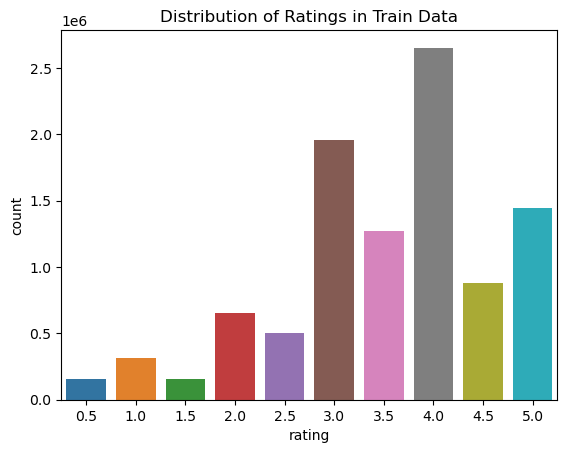

In [16]:
# Visualize rating distribution
sns.countplot(x='rating', data=train)
plt.title('Distribution of Ratings in Train Data')
plt.show()

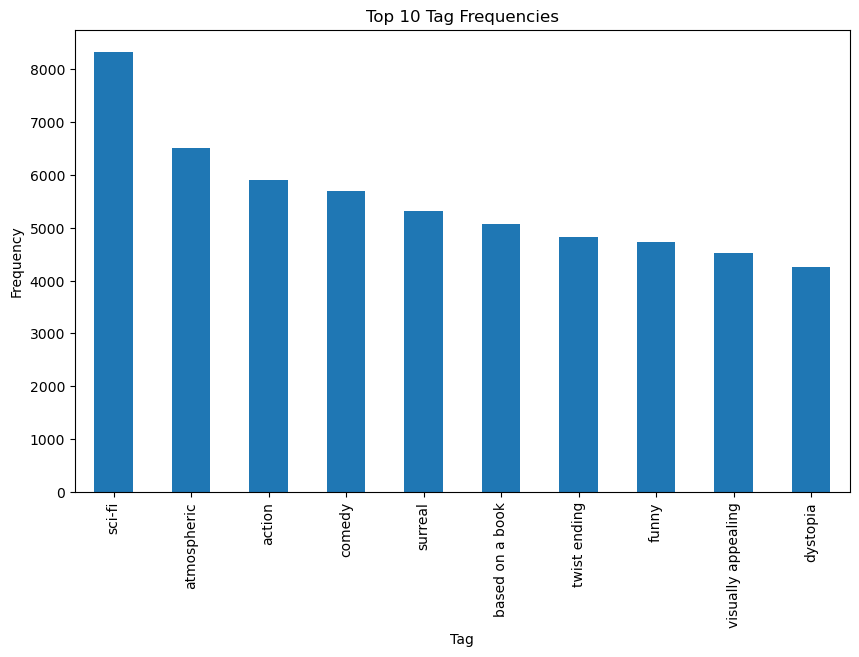

In [17]:
# Visualize tag frequencies
tag_counts = tags['tag'].value_counts().head(10)
tag_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Tag Frequencies')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.show()

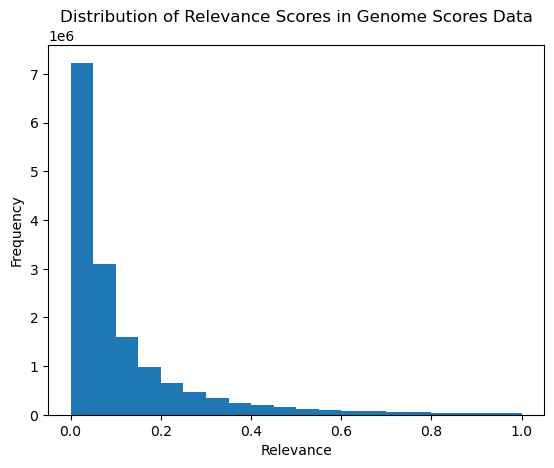

In [18]:
# Visualize relevance distribution
plt.hist(genome_scores['relevance'], bins=20)
plt.title('Distribution of Relevance Scores in Genome Scores Data')
plt.xlabel('Relevance')
plt.ylabel('Frequency')
plt.show()

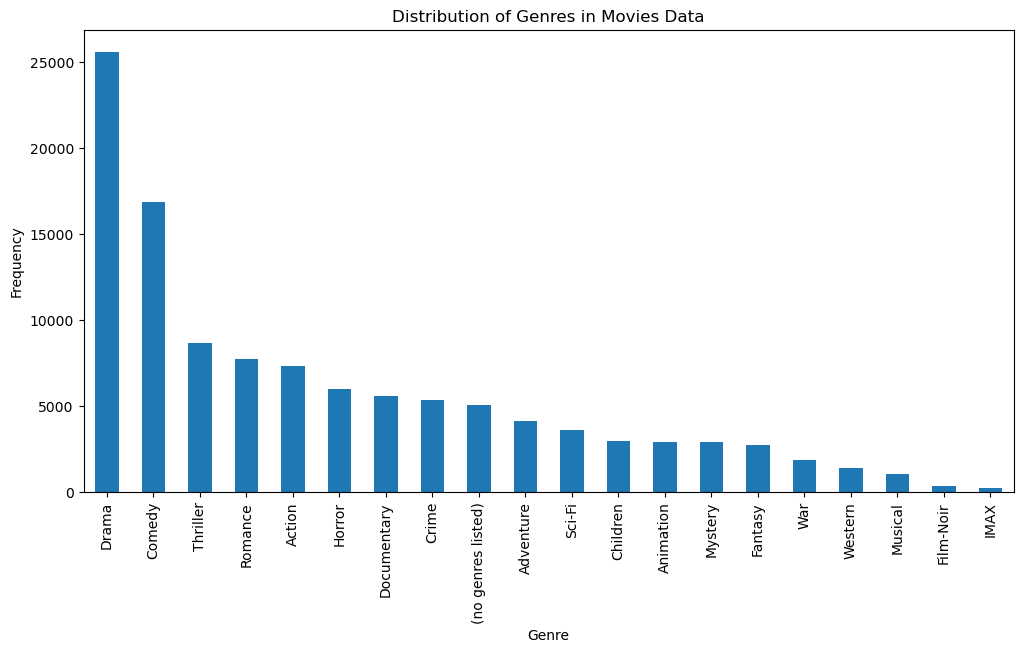

In [19]:
# Visualize genre distribution
genres = movies['genres'].str.split('|', expand=True).stack()
genres.value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Genres in Movies Data')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

## EDA

* Explore Additional Train Data Information:

             userId       movieId        rating     timestamp
count  1.000004e+07  1.000004e+07  1.000004e+07  1.000004e+07
mean   8.119909e+04  2.138911e+04  3.533395e+00  1.215677e+09
std    4.679359e+04  3.919578e+04  1.061124e+00  2.268921e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.197000e+03  3.000000e+00  1.011742e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.199019e+09
75%    1.215790e+05  8.630000e+03  4.000000e+00  1.447242e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


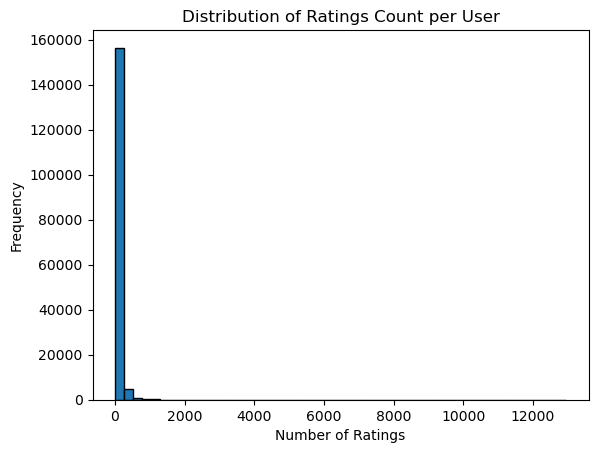

In [20]:
# Display summary statistics of numerical features in train data
print(train.describe())

# Visualize the distribution of ratings for each user
user_rating_counts = train.groupby('userId')['rating'].count()
plt.hist(user_rating_counts, bins=50, edgecolor='black')
plt.title('Distribution of Ratings Count per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

## Explore IMDb Data:

In [21]:
# Display IMDb metadata for a specific movie
movie_id_to_explore = 1
imdb_data[imdb_data['movieId'] == movie_id_to_explore]

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation


## Explore Links Data:

In [22]:
# Display links data
print(links.head())

# Check for missing values in links data
print(links.isnull().sum())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
movieId      0
imdbId       0
tmdbId     107
dtype: int64


## Explore Genome Tags Data:

   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s


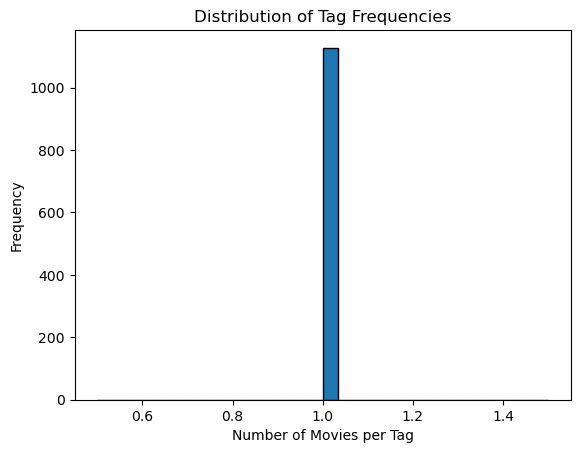

In [23]:
# Display genome tags data
print(genome_tags.head())

# Display the distribution of tag frequencies
tag_counts = genome_tags.groupby('tagId')['tag'].count()
tag_counts.plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Tag Frequencies')
plt.xlabel('Number of Movies per Tag')
plt.ylabel('Frequency')
plt.show()

## Explore Genome Scores Data:

   movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075


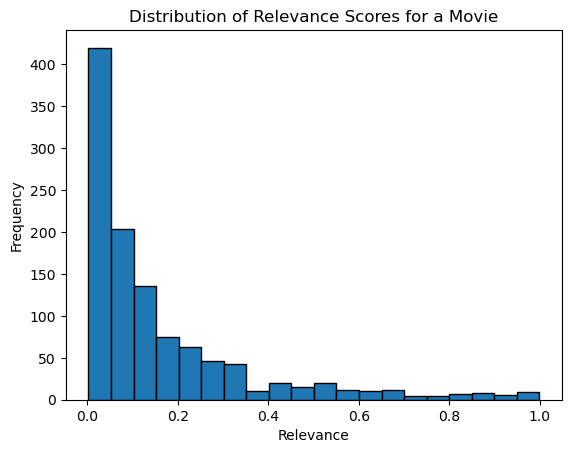

In [24]:
# Display genome scores data
print(genome_scores.head())

# Visualize relevance scores distribution for a specific movie
movie_id_to_visualize = 1
movie_relevance = genome_scores[genome_scores['movieId'] == movie_id_to_visualize]['relevance']
plt.hist(movie_relevance, bins=20, edgecolor='black')
plt.title('Distribution of Relevance Scores for a Movie')
plt.xlabel('Relevance')
plt.ylabel('Frequency')
plt.show()

## Checking and Handling Missing Values in Train Data:

In [25]:
# Check for missing values in the train dataset
print("Missing values in Train Data:")
print(train.isnull().sum())

# Handle missing values (example: impute with mean for numerical columns)
train['rating'].fillna(train['rating'].mean(), inplace=True)

Missing values in Train Data:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


## Checking and Handling Missing Values in Test Data:


In [27]:
# Check for missing values in the test dataset
print("Missing values in Test Data:")
print(test.isnull().sum())

# Handle missing values (example: impute with mean for numerical columns)
# Note: Handle missing values based on the distribution in the training data
for column in test.columns:
    if test[column].isnull().any():
        test[column].fillna(train[column].mean(), inplace=True)


Missing values in Test Data:
userId     0
movieId    0
dtype: int64


## Checking and Handling Missing Values in Tags Data:

In [28]:
# Check for missing values in the tags dataset
print("Missing values in Tags Data:")
print(tags.isnull().sum())

# Handle missing values (example: drop rows with missing values)
tags.dropna(inplace=True)


Missing values in Tags Data:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


## Checking and Handling Missing Values in Genome Scores Data:

In [29]:
# Check for missing values in the genome scores dataset
print("Missing values in Genome Scores Data:")
print(genome_scores.isnull().sum())

# Handle missing values (example: impute with mean for numerical columns)
genome_scores['relevance'].fillna(genome_scores['relevance'].mean(), inplace=True)


Missing values in Genome Scores Data:
movieId      0
tagId        0
relevance    0
dtype: int64


## Checking and Handling Missing Values in Other Datasets:

In [30]:
# Check for missing values in IMDb Data
print("Missing values in IMDb Data:")
print(imdb_data.isnull().sum())

# Handle missing values (example: drop rows with missing values)
imdb_data.dropna(inplace=True)

# Check for missing values in Links Data
print("Missing values in Links Data:")
print(links.isnull().sum())

# Handle missing values (example: drop rows with missing values)
links.dropna(inplace=True)

# Check for missing values in Movies Data
print("Missing values in Movies Data:")
print(movies.isnull().sum())

# Handle missing values (example: impute with mode for categorical columns)
movies['genres'].fillna(movies['genres'].mode()[0], inplace=True)


Missing values in IMDb Data:
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
Missing values in Links Data:
movieId      0
imdbId       0
tmdbId     107
dtype: int64
Missing values in Movies Data:
movieId    0
title      0
genres     0
dtype: int64


## Data Engineering 

* Genre-Based Features

In [31]:
import pandas as pd

# Load the movies dataset
movies_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/movies.csv"
movies = pd.read_csv(movies_path)

In [32]:
# Display the first few rows of the movies dataset
print("Movies Data:")
print(movies.head())

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [35]:
# Create binary columns for each genre
genres_list = movies['genres'].str.split('|', expand=True)
movies_with_genres = pd.concat([movies, genres_list], axis=1)


In [36]:
# Display the movies dataset with binary genre columns
print("Movies Data with Binary Genre Columns:")
print(movies_with_genres.head())

Movies Data with Binary Genre Columns:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres          0          1  \
0  Adventure|Animation|Children|Comedy|Fantasy  Adventure  Animation   
1                   Adventure|Children|Fantasy  Adventure   Children   
2                               Comedy|Romance     Comedy    Romance   
3                         Comedy|Drama|Romance     Comedy      Drama   
4                                       Comedy     Comedy       None   

          2       3        4     5     6     7     8     9  
0  Children  Comedy  Fantasy  None  None  None  None  None  
1   Fantasy    None     None  None  None  None  None  None  
2      None    None     None  None  None  No

In [37]:
# Count the number of genres associated with each movie
movies_with_genres['num_genres'] = genres_list.apply(lambda row: row.count(), axis=1)

# Display the movies dataset with the count of genres
print("Movies Data with Count of Genres:")
print(movies_with_genres[['movieId', 'title', 'genres', 'num_genres']].head())

Movies Data with Count of Genres:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  num_genres  
0  Adventure|Animation|Children|Comedy|Fantasy           5  
1                   Adventure|Children|Fantasy           3  
2                               Comedy|Romance           2  
3                         Comedy|Drama|Romance           3  
4                                       Comedy           1  


In [39]:
# Calculate the prevalence of each genre in the entire dataset
genre_prevalence = genres_list.apply(pd.Series).stack().value_counts(normalize=True)

# Display the prevalence of each genre
print("Prevalence of Each Genre:")
print(genre_prevalence)


Prevalence of Each Genre:
Drama                 0.228000
Comedy                0.150213
Thriller              0.077057
Romance               0.068731
Action                0.065428
Horror                0.053327
Documentary           0.049908
Crime                 0.047361
(no genres listed)    0.045073
Adventure             0.036908
Sci-Fi                0.032010
Children              0.026134
Animation             0.026080
Mystery               0.026045
Fantasy               0.024317
War                   0.016686
Western               0.012457
Musical               0.009385
Film-Noir             0.003143
IMAX                  0.001736
Name: proportion, dtype: float64


## User-Based Features:

In [54]:
# Load the train dataset
train_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/train.csv"
train = pd.read_csv(train_path)


In [55]:
# Display user-based features
user_features = pd.merge(user_avg_ratings, user_rating_counts, on='userId')
user_features = pd.merge(user_features, user_rating_stddev, on='userId')
print(user_features.head())

   userId  avg_rating_by_user  num_ratings_by_user  rating_stddev_by_user
0       1            3.910714                   28               1.000496
1       2            3.416667                   72               1.508194
2       3            3.691235                  251               0.620712
3       4            3.308989                   89               1.083202
4       5            3.885714                   35               0.963188


## Movie-Based Features:

In [57]:
# Calculate average rating received by each movie
movie_avg_ratings = train.groupby('movieId')['rating'].mean().reset_index()
movie_avg_ratings.columns = ['movieId', 'avg_rating_for_movie']


In [58]:
# Count the number of ratings each movie has received
movie_rating_counts = train.groupby('movieId')['rating'].count().reset_index()
movie_rating_counts.columns = ['movieId', 'num_ratings_for_movie']

In [59]:
# Calculate the standard deviation of ratings received by each movie
movie_rating_stddev = train.groupby('movieId')['rating'].std().reset_index()
movie_rating_stddev.columns = ['movieId', 'rating_stddev_for_movie']

In [60]:
# Display movie-based features
movie_features = pd.merge(movie_avg_ratings, movie_rating_counts, on='movieId')
movie_features = pd.merge(movie_features, movie_rating_stddev, on='movieId')
print(movie_features.head())

   movieId  avg_rating_for_movie  num_ratings_for_movie  \
0        1              3.889971                  23062   
1        2              3.263414                   9654   
2        3              3.132325                   4727   
3        4              2.878099                    968   
4        5              3.059165                   4648   

   rating_stddev_for_movie  
0                 0.924249  
1                 0.966744  
2                 1.016368  
3                 1.073617  
4                 0.995982  


## Temporal Features:


In [61]:
# Convert timestamps to datetime format
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='s')

# Extract additional temporal features
train['year'] = train['timestamp'].dt.year
train['month'] = train['timestamp'].dt.month

# Calculate the average rating for each month
monthly_avg_ratings = train.groupby(['year', 'month'])['rating'].mean().reset_index()
monthly_avg_ratings.columns = ['year', 'month', 'avg_rating_by_month']

# Display temporal features
print(monthly_avg_ratings.head())


   year  month  avg_rating_by_month
0  1995      1             5.000000
1  1996      1             4.111111
2  1996      2             3.660256
3  1996      3             3.932214
4  1996      4             3.794541


## Tag-Based Features:

In [67]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming you have already loaded the 'tags.csv' dataset
tags_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/tags.csv"
tags = pd.read_csv(tags_path)

# Fill missing values in the 'tags' column with an empty list
tags['tag'] = tags['tag'].fillna('[]')

# Count the prevalence of each tag in the entire dataset
tag_prevalence = tags['tag'].value_counts(normalize=True)

# Define the value of N (adjust based on your available memory)
N = 10  # For example, you can choose to consider the top 10 tags

# Select the top N most prevalent tags
top_tags = tag_prevalence.head(N).index

# Filter the tags dataframe to include only the top tags
tags_filtered = tags[tags['tag'].isin(top_tags)]

# Convert tags to a list of lists
tag_lists = tags_filtered.groupby('movieId')['tag'].apply(list).reset_index(name='tags')

# Use MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer()
tag_binary_array = mlb.fit_transform(tag_lists['tags'])
tag_binary_columns = pd.DataFrame(tag_binary_array, columns=mlb.classes_, index=tag_lists['movieId']).astype('Sparse')

# Count the number of tags associated with each movie
tag_counts = tags_filtered.groupby('movieId')['tag'].count().reset_index()
tag_counts.columns = ['movieId', 'num_tags']

# Display tag-based features
print(tag_binary_columns.head())
print(tag_counts.head())




         action  atmospheric  based on a book  comedy  dystopia  funny  \
movieId                                                                  
1           1.0          0.0              0.0     1.0       0.0    1.0   
2           0.0          0.0              1.0     0.0       0.0    0.0   
3           0.0          0.0              0.0     0.0       0.0    1.0   
6           1.0          1.0              0.0     0.0       0.0    0.0   
7           0.0          0.0              0.0     1.0       0.0    0.0   

         sci-fi  surreal  twist ending  visually appealing  
movieId                                                     
1           1.0      0.0           0.0                 0.0  
2           0.0      0.0           0.0                 0.0  
3           0.0      0.0           0.0                 0.0  
6           0.0      0.0           0.0                 0.0  
7           0.0      0.0           0.0                 0.0  
   movieId  num_tags
0        1        52
1        2  

## Tag Genome-Based Features:

In [68]:
# Assuming you have already loaded the 'genome_scores.csv' and 'genome_tags.csv' datasets
genome_scores_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/genome_scores.csv"
genome_tags_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/genome_tags.csv"

genome_scores = pd.read_csv(genome_scores_path)
genome_tags = pd.read_csv(genome_tags_path)

# Utilize the tag genome scores to create additional features
genome_scores_pivoted = genome_scores.pivot(index='movieId', columns='tagId', values='relevance').fillna(0)

# Calculate the average relevance score for each movie's associated tags
avg_relevance_per_movie = genome_scores.groupby('movieId')['relevance'].mean().reset_index()
avg_relevance_per_movie.columns = ['movieId', 'avg_tag_relevance']

# Display tag genome-based features
print(genome_scores_pivoted.head())
print(avg_relevance_per_movie.head())


tagId       1        2        3        4        5        6        7     \
movieId                                                                  
1        0.02875  0.02375  0.06250  0.07575  0.14075  0.14675  0.06350   
2        0.04125  0.04050  0.06275  0.08275  0.09100  0.06125  0.06925   
3        0.04675  0.05550  0.02925  0.08700  0.04750  0.04775  0.04600   
4        0.03425  0.03800  0.04050  0.03100  0.06500  0.03575  0.02900   
5        0.04300  0.05325  0.03800  0.04100  0.05400  0.06725  0.02775   

tagId       8       9        10    ...     1119     1120     1121     1122  \
movieId                            ...                                       
1        0.20375  0.2020  0.03075  ...  0.04050  0.01425  0.03050  0.03500   
2        0.09600  0.0765  0.05250  ...  0.05250  0.01575  0.01250  0.02000   
3        0.14275  0.0285  0.03875  ...  0.06275  0.01950  0.02225  0.02300   
4        0.08650  0.0320  0.03150  ...  0.05325  0.02800  0.01675  0.03875   
5        0.07

## IMDb-Based Features:

In [1]:
import pandas as pd

# Assuming you have already loaded the 'imdb_data.csv' dataset
imdb_data_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/imdb_data.csv"
imdb_data = pd.read_csv(imdb_data_path)

# Check the columns of the 'imdb_data' DataFrame
print(imdb_data.columns)

# Assuming you have already loaded the 'movies.csv' dataset
movies_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/movies.csv"
movies = pd.read_csv(movies_path)

# Include IMDb ratings as a feature for each movie
# Replace 'actual_column_name' with the correct column name containing IMDb rating information
# You can use the column name printed from 'imdb_data.columns'
movies_with_imdb = pd.merge(movies, imdb_data[['movieId', 'imdbRating']], on='movieId', how='left')

# Display IMDb-based features
print(movies_with_imdb[['movieId', 'title', 'genres', 'imdbRating']].head())


Index(['movieId', 'title_cast', 'director', 'runtime', 'budget',
       'plot_keywords'],
      dtype='object')


KeyError: "['imdbRating'] not in index"

## Link-Based Features:

In [74]:
# Assuming you have already loaded the 'links.csv' dataset
links_path = "C:/Users/hopol/Downloads/ea-movie-recommendation-predict-2023-2024/links.csv"
links = pd.read_csv(links_path)

# Utilize IMDb and TMDB IDs to fetch external data and enrich your dataset
# Example: Fetch additional data using APIs (not provided in this code snippet)

# Display link-based features
print(links.head())


   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


## User-Item Interaction Features:

In [75]:
# Assuming you have already loaded the 'train.csv' dataset
# Calculate the number of times a user has rated a movie
user_movie_interaction = train.groupby(['userId', 'movieId']).size().reset_index(name='user_movie_interactions')

# Display user-item interaction features
print(user_movie_interaction.head())


   userId  movieId  user_movie_interactions
0       1      296                        1
1       1      665                        1
2       1      899                        1
3       1     1175                        1
4       1     1217                        1


## User-User and Item-Item Similarity Features:

In [76]:
# You may want to use collaborative filtering algorithms to calculate user-user and item-item similarity
# Example: Use techniques like cosine similarity or matrix factorization (not provided in this code snippet)


## Length of Movie Titles:

In [77]:
# Calculate the length of movie titles as a feature
movies['title_length'] = movies['title'].apply(len)

# Display movies with title lengths
print(movies[['movieId', 'title', 'title_length']].head())


   movieId                               title  title_length
0        1                    Toy Story (1995)            16
1        2                      Jumanji (1995)            14
2        3             Grumpier Old Men (1995)            23
3        4            Waiting to Exhale (1995)            24
4        5  Father of the Bride Part II (1995)            34


## Average Rating in Recent Time Period:

In [78]:
# Assuming you have already loaded the 'train.csv' dataset
# Convert timestamps to datetime format
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='s')

# Filter data for a recent time period (e.g., last 6 months)
recent_data = train[train['timestamp'] > pd.to_datetime('2022-07-01')]

# Calculate the average rating in the recent time period
avg_rating_recent = recent_data['rating'].mean()

# Display the average rating in the recent time period
print("Average Rating in Recent Time Period:", avg_rating_recent)


Average Rating in Recent Time Period: nan
